<a href="https://colab.research.google.com/github/James-Ly-MA5851/MA5851Assignment3/blob/MA5851Assignment3Dev_1.0/MA5851_A3_Code_James_Ly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 1a - Web Scraping of tweets from Twitter**

In [1]:
# Install packages

!pip install -q snscrape

In [2]:
# Import packages

import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools
from google.colab import files
import io

In [ ]:
# Create dataframe of scraped tweets using the search terms "covid", "covid19" and "coronavirus" (must include "australia")

tweets_df = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper('("covid" AND "australia") OR ("covid19" AND "australia") OR ("coronavirus" AND "australia")').get_items(), 20000))

Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=%28%22covid%22+AND+%22australia%22%29+OR+%28%22covid19%22+AND+%22australia%22%29+OR+%28%22coronavirus%22+AND+%22australia%22%29&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaKwKPhzq3W0SgWhsCjzaSY3d4oEnEV2LxiFYCJehgHREVGQVVMVDUBFaoQFQAA&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ConnectionError(ProtocolError('Connection aborted.', ConnectionResetError(104, 'Co

In [ ]:
# Preview the tweets dataframe

display(tweets_df)

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/SMorganGrahame/status/1467...,2021-12-05 12:51:53+00:00,It’s taken a lot but @RemyMoynes and I are alm...,1467476823227265031,SMorganGrahame,[],,[],
1,https://twitter.com/JosephMIFSUD206/status/146...,2021-12-05 12:51:32+00:00,Australia: Protesters swarm Melbourne streets ...,1467476733377007619,JosephMIFSUD206,[https://youtu.be/9O7CMDouJhc],https://youtu.be/9O7CMDouJhc,[https://t.co/ShDkJ4qGjV],https://t.co/ShDkJ4qGjV
2,https://twitter.com/dailymail241/status/146747...,2021-12-05 12:51:27+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476711923240967,dailymail241,[https://usmail24.com/covid-19-australia-victo...,https://usmail24.com/covid-19-australia-victor...,[https://t.co/KLSQj8PLXJ],https://t.co/KLSQj8PLXJ
3,https://twitter.com/usmail24/status/1467476708...,2021-12-05 12:51:26+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476708873879569,usmail24,[https://usmail24.com/covid-19-australia-victo...,https://usmail24.com/covid-19-australia-victor...,[https://t.co/GSjW2J7cjm],https://t.co/GSjW2J7cjm
4,https://twitter.com/NewsOfAmerica4/status/1467...,2021-12-05 12:51:01+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476605522124809,NewsOfAmerica4,[https://usmail24.com/covid-19-australia-victo...,https://usmail24.com/covid-19-australia-victor...,[https://t.co/8oQjLQ71sa],https://t.co/8oQjLQ71sa
...,...,...,...,...,...,...,...,...,...
19995,https://twitter.com/RossaMullin/status/1463550...,2021-11-24 16:52:04+00:00,@simoncoveney @dfatirl @AusEmbIre \nThese incl...,1463550999558246407,RossaMullin,[https://twitter.com/UK__Citizen/status/146343...,https://twitter.com/UK__Citizen/status/1463439...,[https://t.co/d3YislNLhb],https://t.co/d3YislNLhb
19996,https://twitter.com/spurstony1979/status/14635...,2021-11-24 16:51:27+00:00,People can you please look at what is going on...,1463550846243852288,spurstony1979,[],,[],
19997,https://twitter.com/MarioGonGuti/status/146355...,2021-11-24 16:51:17+00:00,«Podríamos decir que el hombre Covid pasa de e...,1463550801226485768,MarioGonGuti,[https://www.hispanidad.com/sociedad/diario-pa...,https://www.hispanidad.com/sociedad/diario-pan...,[https://t.co/fzzCsKFEyI],https://t.co/fzzCsKFEyI
19998,https://twitter.com/July91434885/status/146354...,2021-11-24 16:46:41+00:00,@alsnig Te comparto información de un chino. E...,1463549643191734277,July91434885,[https://twitter.com/songpinganq/status/142955...,https://twitter.com/songpinganq/status/1429558...,[https://t.co/mjk1naj7ZW],https://t.co/mjk1naj7ZW


In [ ]:
# Display the columns of the tweets dataframe

tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   url            20000 non-null  object             
 1   date           20000 non-null  datetime64[ns, UTC]
 2   content        20000 non-null  object             
 3   id             20000 non-null  int64              
 4   username       20000 non-null  object             
 5   outlinks       20000 non-null  object             
 6   outlinksss     20000 non-null  object             
 7   tcooutlinks    20000 non-null  object             
 8   tcooutlinksss  20000 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 1.4+ MB


In [ ]:
# Export tweets dataframe to csv for future use

tweets_df.to_csv('tweets_dataframe_20211205')

In [3]:
# Upload previously saved tweets dataframe to avoid re-extraction

uploaded_tweets = files.upload()

Saving tweets_dataframe_20211205.csv to tweets_dataframe_20211205.csv


In [4]:
# Load previously saved data into dataframe

tweets_df = pd.read_csv(io.BytesIO(uploaded_tweets['tweets_dataframe_20211205.csv']))

# Check the data has been loaded correctly

display(tweets_df)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,0,https://twitter.com/SMorganGrahame/status/1467...,2021-12-05 12:51:53+00:00,It’s taken a lot but @RemyMoynes and I are alm...,1467476823227265031,SMorganGrahame,[],NaN,[],NaN
1,1,https://twitter.com/JosephMIFSUD206/status/146...,2021-12-05 12:51:32+00:00,Australia: Protesters swarm Melbourne streets ...,1467476733377007619,JosephMIFSUD206,['https://youtu.be/9O7CMDouJhc'],https://youtu.be/9O7CMDouJhc,['https://t.co/ShDkJ4qGjV'],https://t.co/ShDkJ4qGjV
2,2,https://twitter.com/dailymail241/status/146747...,2021-12-05 12:51:27+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476711923240967,dailymail241,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/KLSQj8PLXJ'],https://t.co/KLSQj8PLXJ
3,3,https://twitter.com/usmail24/status/1467476708...,2021-12-05 12:51:26+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476708873879569,usmail24,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/GSjW2J7cjm'],https://t.co/GSjW2J7cjm
4,4,https://twitter.com/NewsOfAmerica4/status/1467...,2021-12-05 12:51:01+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476605522124809,NewsOfAmerica4,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/8oQjLQ71sa'],https://t.co/8oQjLQ71sa
...,...,...,...,...,...,...,...,...,...,...
19995,19995,https://twitter.com/RossaMullin/status/1463550...,2021-11-24 16:52:04+00:00,@simoncoveney @dfatirl @AusEmbIre \nThese incl...,1463550999558246407,RossaMullin,['https://twitter.com/UK__Citizen/status/14634...,https://twitter.com/UK__Citizen/status/1463439...,['https://t.co/d3YislNLhb'],https://t.co/d3YislNLhb
19996,19996,https://twitter.com/spurstony1979/status/14635...,2021-11-24 16:51:27+00:00,People can you please look at what is going on...,1463550846243852288,spurstony1979,[],NaN,[],NaN
19997,19997,https://twitter.com/MarioGonGuti/status/146355...,2021-11-24 16:51:17+00:00,«Podríamos decir que el hombre Covid pasa de e...,1463550801226485768,MarioGonGuti,['https://www.hispanidad.com/sociedad/diario-p...,https://www.hispanidad.com/sociedad/diario-pan...,['https://t.co/fzzCsKFEyI'],https://t.co/fzzCsKFEyI
19998,19998,https://twitter.com/July91434885/status/146354...,2021-11-24 16:46:41+00:00,@alsnig Te comparto información de un chino. E...,1463549643191734277,July91434885,['https://twitter.com/songpinganq/status/14295...,https://twitter.com/songpinganq/status/1429558...,['https://t.co/mjk1naj7ZW'],https://t.co/mjk1naj7ZW


# **Section 1b - Load metadata of Australian Government Twitter accounts**

In [5]:
# Import packages

import requests

In [ ]:
# Check the status code of the metadata data.gov.au

url = 'https://data.gov.au/dataset/699cfc1f-ae4c-4968-bddd-ef309e163bba/resource/21319050-8ab2-446e-be17-59570d3fa891/download/Twitter-Followers-2016-01-05.csv'
response = requests.get(url)
print(response.status_code)

200


In [ ]:
# Save the metadata into a dataframe

request = requests.get(url).content
govt_twitter_df = pd.read_csv(io.StringIO(request.decode('utf-8')))

# Check the metadata has been loaded correctly

display(govt_twitter_df)

,Month,Year,Twitter,Display Name,Verified,End of Month Followers,Tweets,Total Times Retweeted,Others Retweeted,Total Times Favourited,Times Other User Mentioned
0,12,2015,@Australia,Australia,1,284203,160,14886,22,31252,138
1,12,2015,@artsculturegov,AusGov Arts&Culture,1,123571,66,179,39,142,21
2,12,2015,@TourismAus,Tourism Australia,1,92479,87,570,18,683,84
3,12,2015,@headspace_aus,headspace,1,54000,47,229,18,246,22
4,12,2015,@BOM_Qld,BOM Queensland,1,50790,74,509,9,349,3
...,...,...,...,...,...,...,...,...,...,...,...
219,12,2015,@sosrExchange,State of the Service,0,220,6,2,0,1,3
220,12,2015,@JohnLloyd_APSC,John Lloyd,1,158,5,1,0,5,0
221,12,2015,@DFATNT,Lorenzo Strano,1,149,14,11,4,16,13
222,12,2015,@Gov_Share,GovShare,1,148,0,0,0,0,0


In [ ]:
# Export metadata to csv for future use

govt_twitter_df.to_csv('Twitter-Followers-2016-01-05')

In [6]:
# Upload previously saved metadata dataframe to avoid re-extraction

uploaded_metadata = files.upload()

Saving Twitter-Followers-2016-01-05.csv to Twitter-Followers-2016-01-05.csv


In [7]:
# Load previously saved metadata into dataframe

govt_twitter_df = pd.read_csv(io.BytesIO(uploaded_metadata['Twitter-Followers-2016-01-05.csv']))

# Check the data has been loaded correctly

display(govt_twitter_df)

,Month,Year,Twitter,Display Name,Verified,End of Month Followers,Tweets,Total Times Retweeted,Others Retweeted,Total Times Favourited,Times Other User Mentioned
0,12,2015,@Australia,Australia,1,284203,160,14886,22,31252,138
1,12,2015,@artsculturegov,AusGov Arts&Culture,1,123571,66,179,39,142,21
2,12,2015,@TourismAus,Tourism Australia,1,92479,87,570,18,683,84
3,12,2015,@headspace_aus,headspace,1,54000,47,229,18,246,22
4,12,2015,@BOM_Qld,BOM Queensland,1,50790,74,509,9,349,3
...,...,...,...,...,...,...,...,...,...,...,...
219,12,2015,@sosrExchange,State of the Service,0,220,6,2,0,1,3
220,12,2015,@JohnLloyd_APSC,John Lloyd,1,158,5,1,0,5,0
221,12,2015,@DFATNT,Lorenzo Strano,1,149,14,11,4,16,13
222,12,2015,@Gov_Share,GovShare,1,148,0,0,0,0,0


# **Section 2 - Pre-process Data**

In [8]:
# Import packages

import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
nltk.download('wordnet')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [9]:
# Load tweets data frame into a corpus

corpus = pd.DataFrame(tweets_df)

# Remove hyperlinks from tweets

def custom_hyperlink(text):
  if not text:
    text = ''
  return re.sub(r"http\S+", "", text)
corpus_hyperlink = corpus['content'].apply(custom_hyperlink)

# Lemmatize words in tweets

def custom_lemmatization(text):
  if not text:
    text = ''
  return WordNetLemmatizer().lemmatize(text, pos='v')
corpus_lemmatized = corpus_hyperlink.apply(custom_lemmatization)

# Split tweets into words

def custom_tokenize(text):
  if not text:
    text = ''
  return word_tokenize(text)
corpus_tokenised = corpus_lemmatized.apply(custom_tokenize)

# Convert to words in tweets lower case

def custom_lower_case(text):
  if not text:
    text = ''
  return [w.lower() for w in text]
corpus_lower_case = corpus_tokenised.apply(custom_lower_case)

# Remove non-alphabetic characters from tweets

def custom_non_alphabetic(text):
  if not text:
    text = ''
  return [word for word in text if word.isalpha()]
corpus_alphabetic = corpus_lower_case.apply(custom_non_alphabetic)

# Remove stop words 

def custom_stopwords(text):
  if not text:
    text = ''
  else:
    stop_words = set(stopwords.words('english'))
  return [w for w in text if not w in stop_words]
corpus_no_stopwords = corpus_alphabetic.apply(custom_stopwords)

# Create dataframe of ISBN and clean descriptions with no duplicates

corpus_cleaned = pd.DataFrame(corpus_no_stopwords)
corpus_cleaned_rename = corpus_cleaned.rename(columns = {'content' : 'content_clean'})

In [10]:
# Checked the cleaned tweets

display(corpus_cleaned_rename)

,content_clean
0,"[taken, lot, remymoynes, almost, australia, li..."
1,"[australia, protesters, swarm, melbourne, stre..."
2,"[australia, victoria, nsw, keep, borders, open..."
3,"[australia, victoria, nsw, keep, borders, open..."
4,"[australia, victoria, nsw, keep, borders, open..."
...,...
19995,"[simoncoveney, dfatirl, ausembire, include, fo..."
19996,"[people, please, look, going, australia, time,..."
19997,"[podríamos, decir, que, el, hombre, covid, pas..."
19998,"[alsnig, te, comparto, información, de, un, ch..."


In [17]:
# Count the number of unique words in the list

unique_words = corpus_cleaned_rename['content_clean'].explode().nunique()
unique_words

31229

In [18]:
# Add cleaned tweets back to the main data

tweets_df['content_clean'] = np.array(corpus_cleaned_rename)
tweets_df['content_clean_str'] = tweets_df['content_clean'].map(str)

In [19]:
# Check the data

display(tweets_df)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,content_clean,content_clean_str
0,0,https://twitter.com/SMorganGrahame/status/1467...,2021-12-05 12:51:53+00:00,It’s taken a lot but @RemyMoynes and I are alm...,1467476823227265031,SMorganGrahame,[],NaN,[],NaN,"[taken, lot, remymoynes, almost, australia, li...","['taken', 'lot', 'remymoynes', 'almost', 'aust..."
1,1,https://twitter.com/JosephMIFSUD206/status/146...,2021-12-05 12:51:32+00:00,Australia: Protesters swarm Melbourne streets ...,1467476733377007619,JosephMIFSUD206,['https://youtu.be/9O7CMDouJhc'],https://youtu.be/9O7CMDouJhc,['https://t.co/ShDkJ4qGjV'],https://t.co/ShDkJ4qGjV,"[australia, protesters, swarm, melbourne, stre...","['australia', 'protesters', 'swarm', 'melbourn..."
2,2,https://twitter.com/dailymail241/status/146747...,2021-12-05 12:51:27+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476711923240967,dailymail241,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/KLSQj8PLXJ'],https://t.co/KLSQj8PLXJ,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord..."
3,3,https://twitter.com/usmail24/status/1467476708...,2021-12-05 12:51:26+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476708873879569,usmail24,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/GSjW2J7cjm'],https://t.co/GSjW2J7cjm,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord..."
4,4,https://twitter.com/NewsOfAmerica4/status/1467...,2021-12-05 12:51:01+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476605522124809,NewsOfAmerica4,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/8oQjLQ71sa'],https://t.co/8oQjLQ71sa,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,https://twitter.com/RossaMullin/status/1463550...,2021-11-24 16:52:04+00:00,@simoncoveney @dfatirl @AusEmbIre \nThese incl...,1463550999558246407,RossaMullin,['https://twitter.com/UK__Citizen/status/14634...,https://twitter.com/UK__Citizen/status/1463439...,['https://t.co/d3YislNLhb'],https://t.co/d3YislNLhb,"[simoncoveney, dfatirl, ausembire, include, fo...","['simoncoveney', 'dfatirl', 'ausembire', 'incl..."
19996,19996,https://twitter.com/spurstony1979/status/14635...,2021-11-24 16:51:27+00:00,People can you please look at what is going on...,1463550846243852288,spurstony1979,[],NaN,[],NaN,"[people, please, look, going, australia, time,...","['people', 'please', 'look', 'going', 'austral..."
19997,19997,https://twitter.com/MarioGonGuti/status/146355...,2021-11-24 16:51:17+00:00,«Podríamos decir que el hombre Covid pasa de e...,1463550801226485768,MarioGonGuti,['https://www.hispanidad.com/sociedad/diario-p...,https://www.hispanidad.com/sociedad/diario-pan...,['https://t.co/fzzCsKFEyI'],https://t.co/fzzCsKFEyI,"[podríamos, decir, que, el, hombre, covid, pas...","['podríamos', 'decir', 'que', 'el', 'hombre', ..."
19998,19998,https://twitter.com/July91434885/status/146354...,2021-11-24 16:46:41+00:00,@alsnig Te comparto información de un chino. E...,1463549643191734277,July91434885,['https://twitter.com/songpinganq/status/14295...,https://twitter.com/songpinganq/status/1429558...,['https://t.co/mjk1naj7ZW'],https://t.co/mjk1naj7ZW,"[alsnig, te, comparto, información, de, un, ch...","['alsnig', 'te', 'comparto', 'información', 'd..."


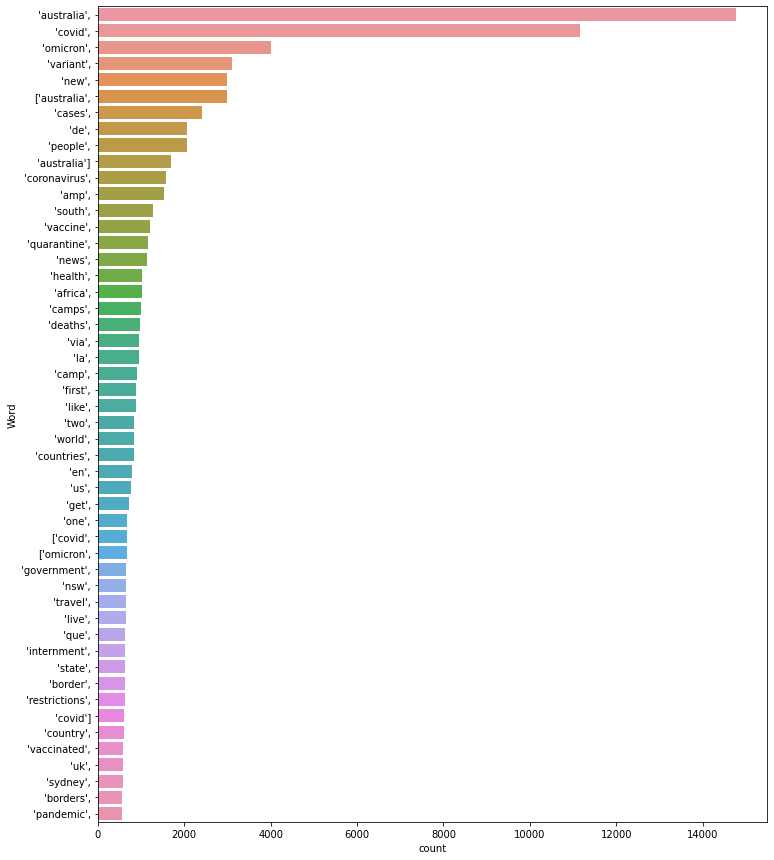

In [22]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 50 most frequent words 
freq_words(tweets_df['content_clean_str'], 50)

In [23]:
# Create list of government Twitter usernames

list_gov_twitter = govt_twitter_df['Display Name'].to_list()

In [24]:
# Create new column to determine if the Tweet username came from a governement twitter account or not

tweets_df_govt = tweets_df
tweets_df_govt['government related'] = ''

def government_related(x):
    if x in list_gov_twitter:
      return 'Government related'
    else:
      return 'Not government related'
tweets_df_govt['government related'] = tweets_df_govt['username'].apply(government_related)

In [25]:
# Check dataframe with new category for government related tweets

display(tweets_df_govt)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,content_clean,content_clean_str,government related
0,0,https://twitter.com/SMorganGrahame/status/1467...,2021-12-05 12:51:53+00:00,It’s taken a lot but @RemyMoynes and I are alm...,1467476823227265031,SMorganGrahame,[],NaN,[],NaN,"[taken, lot, remymoynes, almost, australia, li...","['taken', 'lot', 'remymoynes', 'almost', 'aust...",Not government related
1,1,https://twitter.com/JosephMIFSUD206/status/146...,2021-12-05 12:51:32+00:00,Australia: Protesters swarm Melbourne streets ...,1467476733377007619,JosephMIFSUD206,['https://youtu.be/9O7CMDouJhc'],https://youtu.be/9O7CMDouJhc,['https://t.co/ShDkJ4qGjV'],https://t.co/ShDkJ4qGjV,"[australia, protesters, swarm, melbourne, stre...","['australia', 'protesters', 'swarm', 'melbourn...",Not government related
2,2,https://twitter.com/dailymail241/status/146747...,2021-12-05 12:51:27+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476711923240967,dailymail241,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/KLSQj8PLXJ'],https://t.co/KLSQj8PLXJ,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord...",Not government related
3,3,https://twitter.com/usmail24/status/1467476708...,2021-12-05 12:51:26+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476708873879569,usmail24,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/GSjW2J7cjm'],https://t.co/GSjW2J7cjm,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord...",Not government related
4,4,https://twitter.com/NewsOfAmerica4/status/1467...,2021-12-05 12:51:01+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476605522124809,NewsOfAmerica4,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/8oQjLQ71sa'],https://t.co/8oQjLQ71sa,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord...",Not government related
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,https://twitter.com/RossaMullin/status/1463550...,2021-11-24 16:52:04+00:00,@simoncoveney @dfatirl @AusEmbIre \nThese incl...,1463550999558246407,RossaMullin,['https://twitter.com/UK__Citizen/status/14634...,https://twitter.com/UK__Citizen/status/1463439...,['https://t.co/d3YislNLhb'],https://t.co/d3YislNLhb,"[simoncoveney, dfatirl, ausembire, include, fo...","['simoncoveney', 'dfatirl', 'ausembire', 'incl...",Not government related
19996,19996,https://twitter.com/spurstony1979/status/14635...,2021-11-24 16:51:27+00:00,People can you please look at what is going on...,1463550846243852288,spurstony1979,[],NaN,[],NaN,"[people, please, look, going, australia, time,...","['people', 'please', 'look', 'going', 'austral...",Not government related
19997,19997,https://twitter.com/MarioGonGuti/status/146355...,2021-11-24 16:51:17+00:00,«Podríamos decir que el hombre Covid pasa de e...,1463550801226485768,MarioGonGuti,['https://www.hispanidad.com/sociedad/diario-p...,https://www.hispanidad.com/sociedad/diario-pan...,['https://t.co/fzzCsKFEyI'],https://t.co/fzzCsKFEyI,"[podríamos, decir, que, el, hombre, covid, pas...","['podríamos', 'decir', 'que', 'el', 'hombre', ...",Not government related
19998,19998,https://twitter.com/July91434885/status/146354...,2021-11-24 16:46:41+00:00,@alsnig Te comparto información de un chino. E...,1463549643191734277,July91434885,['https://twitter.com/songpinganq/status/14295...,https://twitter.com/songpinganq/status/1429558...,['https://t.co/mjk1naj7ZW'],https://t.co/mjk1naj7ZW,"[alsnig, te, comparto, información, de, un, ch...","['alsnig', 'te', 'comparto', 'información', 'd...",Not government related


In [26]:
# Check how many tweets are from government entities and how many are not

tweets_df_govt.groupby(['government related','username']).count()

Unnamed: 0  ...  content_clean_str
government related     username                 ...                   
Government related     CSIRO                 2  ...                  2
Not government related 01kris                1  ...                  1
                       020644                1  ...                  1
                       0467luis              1  ...                  1
                       08Kiran92             2  ...                  2
...                                        ...  ...                ...
                       zub73960977           1  ...                  1
                       zwergie1              1  ...                  1
                       zychj                 1  ...                  1
                       zyiteblog             3  ...                  3
                       zzcmathe              1  ...                  1

[12355 rows x 11 columns]

# **Section 3a - Sentiment Analysis**

In [36]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline 

In [37]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the tweets (uncleaned)

tweets_df_govt['sentiment'] = tweets_df_govt.apply(lambda r: sid.polarity_scores(r.content), axis=1)

# Preview the sentiment scores

tweets_df_govt.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,content_clean,content_clean_str,government related,sentiment
0,0,https://twitter.com/SMorganGrahame/status/1467...,2021-12-05 12:51:53+00:00,It’s taken a lot but @RemyMoynes and I are alm...,1467476823227265031,SMorganGrahame,[],NaN,[],NaN,"[taken, lot, remymoynes, almost, australia, li...","['taken', 'lot', 'remymoynes', 'almost', 'aust...",Not government related,"{'neg': 0.133, 'neu': 0.732, 'pos': 0.135, 'co..."
1,1,https://twitter.com/JosephMIFSUD206/status/146...,2021-12-05 12:51:32+00:00,Australia: Protesters swarm Melbourne streets ...,1467476733377007619,JosephMIFSUD206,['https://youtu.be/9O7CMDouJhc'],https://youtu.be/9O7CMDouJhc,['https://t.co/ShDkJ4qGjV'],https://t.co/ShDkJ4qGjV,"[australia, protesters, swarm, melbourne, stre...","['australia', 'protesters', 'swarm', 'melbourn...",Not government related,"{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compou..."
2,2,https://twitter.com/dailymail241/status/146747...,2021-12-05 12:51:27+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476711923240967,dailymail241,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/KLSQj8PLXJ'],https://t.co/KLSQj8PLXJ,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord...",Not government related,"{'neg': 0.356, 'neu': 0.644, 'pos': 0.0, 'comp..."
3,3,https://twitter.com/usmail24/status/1467476708...,2021-12-05 12:51:26+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476708873879569,usmail24,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/GSjW2J7cjm'],https://t.co/GSjW2J7cjm,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord...",Not government related,"{'neg': 0.356, 'neu': 0.644, 'pos': 0.0, 'comp..."
4,4,https://twitter.com/NewsOfAmerica4/status/1467...,2021-12-05 12:51:01+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476605522124809,NewsOfAmerica4,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/8oQjLQ71sa'],https://t.co/8oQjLQ71sa,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord...",Not government related,"{'neg': 0.356, 'neu': 0.644, 'pos': 0.0, 'comp..."


In [38]:
# Create an overall score of sentiment

tweets_df_govt['compound']  = tweets_df_govt['sentiment'].apply(lambda score_dict: score_dict['compound'])
tweets_df_govt.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,content_clean,content_clean_str,government related,sentiment,compound
0,0,https://twitter.com/SMorganGrahame/status/1467...,2021-12-05 12:51:53+00:00,It’s taken a lot but @RemyMoynes and I are alm...,1467476823227265031,SMorganGrahame,[],NaN,[],NaN,"[taken, lot, remymoynes, almost, australia, li...","['taken', 'lot', 'remymoynes', 'almost', 'aust...",Not government related,"{'neg': 0.133, 'neu': 0.732, 'pos': 0.135, 'co...",0.0387
1,1,https://twitter.com/JosephMIFSUD206/status/146...,2021-12-05 12:51:32+00:00,Australia: Protesters swarm Melbourne streets ...,1467476733377007619,JosephMIFSUD206,['https://youtu.be/9O7CMDouJhc'],https://youtu.be/9O7CMDouJhc,['https://t.co/ShDkJ4qGjV'],https://t.co/ShDkJ4qGjV,"[australia, protesters, swarm, melbourne, stre...","['australia', 'protesters', 'swarm', 'melbourn...",Not government related,"{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compou...",-0.2263
2,2,https://twitter.com/dailymail241/status/146747...,2021-12-05 12:51:27+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476711923240967,dailymail241,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/KLSQj8PLXJ'],https://t.co/KLSQj8PLXJ,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord...",Not government related,"{'neg': 0.356, 'neu': 0.644, 'pos': 0.0, 'comp...",-0.8020
3,3,https://twitter.com/usmail24/status/1467476708...,2021-12-05 12:51:26+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476708873879569,usmail24,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/GSjW2J7cjm'],https://t.co/GSjW2J7cjm,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord...",Not government related,"{'neg': 0.356, 'neu': 0.644, 'pos': 0.0, 'comp...",-0.8020
4,4,https://twitter.com/NewsOfAmerica4/status/1467...,2021-12-05 12:51:01+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476605522124809,NewsOfAmerica4,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/8oQjLQ71sa'],https://t.co/8oQjLQ71sa,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord...",Not government related,"{'neg': 0.356, 'neu': 0.644, 'pos': 0.0, 'comp...",-0.8020


In [39]:
# Create a positive and negative category for each tweet

tweets_df_govt['comp_score'] = tweets_df_govt['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
tweets_df_govt.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,content_clean,content_clean_str,government related,sentiment,compound,comp_score
0,0,https://twitter.com/SMorganGrahame/status/1467...,2021-12-05 12:51:53+00:00,It’s taken a lot but @RemyMoynes and I are alm...,1467476823227265031,SMorganGrahame,[],NaN,[],NaN,"[taken, lot, remymoynes, almost, australia, li...","['taken', 'lot', 'remymoynes', 'almost', 'aust...",Not government related,"{'neg': 0.133, 'neu': 0.732, 'pos': 0.135, 'co...",0.0387,pos
1,1,https://twitter.com/JosephMIFSUD206/status/146...,2021-12-05 12:51:32+00:00,Australia: Protesters swarm Melbourne streets ...,1467476733377007619,JosephMIFSUD206,['https://youtu.be/9O7CMDouJhc'],https://youtu.be/9O7CMDouJhc,['https://t.co/ShDkJ4qGjV'],https://t.co/ShDkJ4qGjV,"[australia, protesters, swarm, melbourne, stre...","['australia', 'protesters', 'swarm', 'melbourn...",Not government related,"{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compou...",-0.2263,neg
2,2,https://twitter.com/dailymail241/status/146747...,2021-12-05 12:51:27+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476711923240967,dailymail241,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/KLSQj8PLXJ'],https://t.co/KLSQj8PLXJ,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord...",Not government related,"{'neg': 0.356, 'neu': 0.644, 'pos': 0.0, 'comp...",-0.8020,neg
3,3,https://twitter.com/usmail24/status/1467476708...,2021-12-05 12:51:26+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476708873879569,usmail24,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/GSjW2J7cjm'],https://t.co/GSjW2J7cjm,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord...",Not government related,"{'neg': 0.356, 'neu': 0.644, 'pos': 0.0, 'comp...",-0.8020,neg
4,4,https://twitter.com/NewsOfAmerica4/status/1467...,2021-12-05 12:51:01+00:00,Covid-19 Australia: Victoria and NSW keep bord...,1467476605522124809,NewsOfAmerica4,['https://usmail24.com/covid-19-australia-vict...,https://usmail24.com/covid-19-australia-victor...,['https://t.co/8oQjLQ71sa'],https://t.co/8oQjLQ71sa,"[australia, victoria, nsw, keep, borders, open...","['australia', 'victoria', 'nsw', 'keep', 'bord...",Not government related,"{'neg': 0.356, 'neu': 0.644, 'pos': 0.0, 'comp...",-0.8020,neg


In [40]:
# Count the total number of positive tweets and negative tweets

tweets_df_govt['comp_score'].value_counts()

pos    12536
neg     7464
Name: comp_score, dtype: int64

government related      comp_score
Government related      pos           [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Not government related  neg           [[AxesSubplot(0.125,0.125;0.775x0.755)]]
                        pos           [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

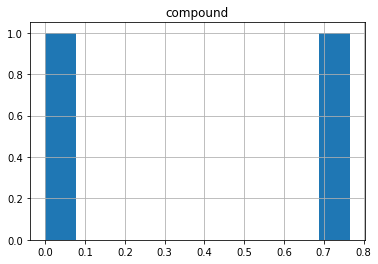

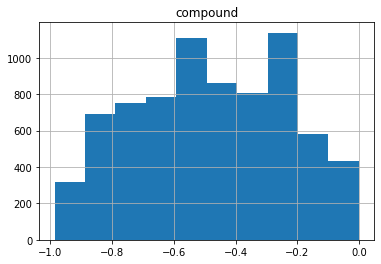

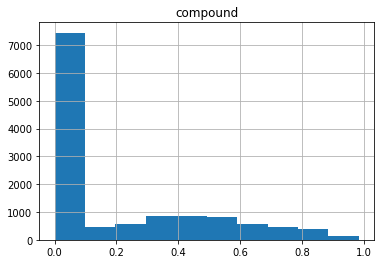

In [44]:
# Analysis of the sentiment scores

tweets_df_hist = tweets_df_govt[["content","government related","comp_score","compound"]]
tweets_df_hist.groupby(['government related','comp_score']).hist()

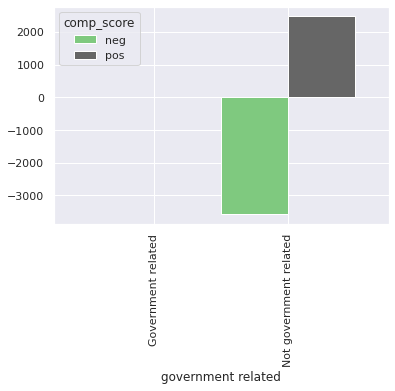

In [45]:
# Analysis of the sentiment scores

import seaborn
import matplotlib.cm as cm
import matplotlib.pyplot as plt

seaborn.set() #make the plots look pretty
ag = tweets_df_hist.groupby(['government related','comp_score']).sum().unstack()
ag.columns = ag.columns.droplevel()

ag.plot(kind = 'bar', colormap = cm.Accent, width = 1)
plt.show()

# **Section 3b - Machine Learning for Sentiment Analysis**

In [46]:
# Convert the categorical data in sentiment score to numerical

sentiment_label = tweets_df_govt.comp_score.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]), Index(['pos', 'neg'], dtype='object'))

In [47]:
# Obtain the values of the tweets

tweets = tweets_df_govt.content.values

In [48]:
# Tokenize the words in the tweets

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweets)

In [49]:
# Replace words with assigned numbers

encoded_docs = tokenizer.texts_to_sequences(tweets)

In [50]:
# Use padding for sentences that do not have equal length

from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [51]:
# Add parameters to the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(5000, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           160000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 176,651
Trainable params: 176,651
Non-trainable params: 0
________________________________________________

In [52]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
500/500 [==============================] - 84s 164ms/step - loss: 0.5295 - accuracy: 0.7212 - val_loss: 0.4864 - val_accuracy: 0.7707
Epoch 2/5
500/500 [==============================] - 82s 164ms/step - loss: 0.3521 - accuracy: 0.8506 - val_loss: 0.5111 - val_accuracy: 0.7905
Epoch 3/5
500/500 [==============================] - 82s 165ms/step - loss: 0.2955 - accuracy: 0.8799 - val_loss: 0.4328 - val_accuracy: 0.8117
Epoch 4/5
500/500 [==============================] - 82s 164ms/step - loss: 0.2623 - accuracy: 0.8956 - val_loss: 0.4398 - val_accuracy: 0.8210
Epoch 5/5
500/500 [==============================] - 82s 164ms/step - loss: 0.2338 - accuracy: 0.9101 - val_loss: 0.4500 - val_accuracy: 0.8240


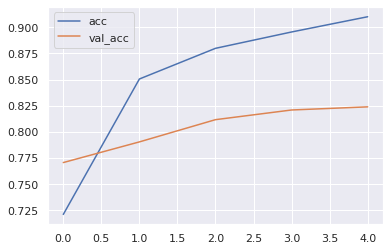

<Figure size 432x288 with 0 Axes>

In [53]:
# Plot the accuracy of the model

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

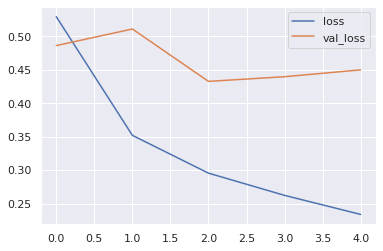

<Figure size 432x288 with 0 Axes>

In [54]:
# Plot the loss of the model

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

In [56]:
# Test the model using two different phrases

def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])
test_sentence1 = "I can not wait to get my vaccine."
predict_sentiment(test_sentence1)
test_sentence2 = "I hate going into lockdown!"
predict_sentiment(test_sentence2)

Predicted label:  pos
Predicted label:  neg


# **Section 4 - LDA Using Sentiment Analysis**

In [ ]:
# Import pandas

import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint

In [ ]:
# Create dataframe for positive and negative sentiment tweets

pos_text = tweets_df_govt[tweets_df_govt['comp_score']=='pos']
neg_text = tweets_df_govt[tweets_df_govt['comp_score']=='neg']
pos_text.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,content_clean,content_clean_str,government related,sentiment,compound,comp_score
0,0,https://twitter.com/Twitchy80887477/status/146...,2021-12-04 05:07:15+00:00,NEW COVID 🦠 VARIANT IN AUSTRALIA! 🤦🏾‍♂️ #short...,1466997506416521216,Twitchy80887477,['https://youtube.com/shorts/XKXuk1qNEEs?featu...,https://youtube.com/shorts/XKXuk1qNEEs?feature...,['https://t.co/lyKqNwI8es'],https://t.co/lyKqNwI8es,"[new, covid, variant, australia, shorts, via, ...","['new', 'covid', 'variant', 'australia', 'shor...",Not government related,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,3,https://twitter.com/tapsHEEloggg/status/146699...,2021-12-04 05:04:06+00:00,kelan ba matatapos covid nato T_T lockdown na ...,1466996712837242880,tapsHEEloggg,[],NaN,[],NaN,"[kelan, ba, matatapos, covid, nato, lockdown, ...","['kelan', 'ba', 'matatapos', 'covid', 'nato', ...",Not government related,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
5,5,https://twitter.com/silrodau/status/1466996188...,2021-12-04 05:02:01+00:00,@haralabob I think Australia did pretty well m...,1466996188050165762,silrodau,[],NaN,[],NaN,"[haralabob, think, australia, pretty, well, ma...","['haralabob', 'think', 'australia', 'pretty', ...",Not government related,"{'neg': 0.12, 'neu': 0.617, 'pos': 0.262, 'com...",0.5574,pos
6,6,https://twitter.com/CovidPete/status/146699614...,2021-12-04 05:01:50+00:00,SOUTH AUSTRALIA\nCOVID-19\nEXPOSURE SITES\n4-1...,1466996141279621121,CovidPete,[],NaN,[],NaN,"[south, australia, exposure, sites]","['south', 'australia', 'exposure', 'sites']",Not government related,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
7,7,https://twitter.com/CovidPete/status/146699613...,2021-12-04 05:01:48+00:00,SOUTH AUSTRALIA\nCOVID-19\nEXPOSURE SITES\n4-1...,1466996134262550528,CovidPete,[],NaN,[],NaN,"[south, australia, exposure, sites]","['south', 'australia', 'exposure', 'sites']",Not government related,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


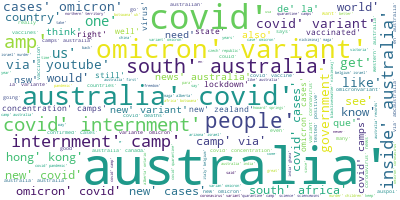

In [ ]:
# Create word cloud of positive sentiment tweets

long_string = ','.join(pos_text['content_clean'].map(str).values)

# Create a WordCloud object

wordcloud_pos = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud

wordcloud_pos.generate(long_string)

# Visualize the word cloud

wordcloud_pos.to_image()

In [ ]:
# Create list for positive tweets

data_words_pos = pos_text['content_clean'].to_list()

# Create Dictionary

id2word_pos = corpora.Dictionary(data_words_pos)

# Create Corpus

texts_pos = data_words_pos

# Term Document Frequency

corpus_pos = [id2word.doc2bow(text) for text in texts_pos]
# View
print(corpus_pos[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [ ]:
# Set the number of topics
num_topics = 3

# Build LDA model for positive tweets
lda_model_pos = gensim.models.LdaMulticore(corpus=corpus_pos,
                                       id2word=id2word_pos,
                                       num_topics=num_topics)

# Print the Keyword in the 5 topics
pprint(lda_model_pos.print_topics())
doc_lda_pos = lda_model_pos[corpus_pos]

[(0,
  '0.063*"australia" + 0.033*"omicron" + 0.029*"covid" + 0.021*"variant" + '
  '0.013*"cases" + 0.012*"new" + 0.009*"coronavirus" + 0.006*"canada" + '
  '0.005*"countries" + 0.005*"south"'),
 (1,
  '0.047*"australia" + 0.024*"covid" + 0.019*"booster" + 0.016*"omicron" + '
  '0.013*"variant" + 0.011*"cases" + 0.008*"new" + 0.007*"vaccine" + '
  '0.006*"shots" + 0.006*"via"'),
 (2,
  '0.029*"australia" + 0.021*"omicron" + 0.017*"variant" + 0.015*"detected" + '
  '0.012*"de" + 0.011*"covid" + 0.010*"vaccine" + 0.009*"time" + '
  '0.009*"coronavirus" + 0.006*"israel"')]


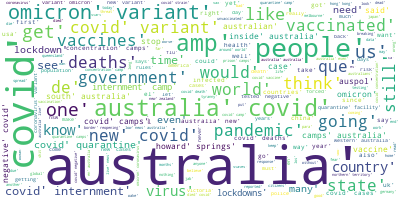

In [ ]:
# Create word cloud of negative sentiment tweets

long_string = ','.join(neg_text['content_clean'].map(str).values)

# Create a WordCloud object

wordcloud_neg = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud

wordcloud_neg.generate(long_string)

# Visualize the word cloud

wordcloud_neg.to_image()

In [ ]:
# Create list for negative tweets

data_words_neg = neg_text['content_clean'].to_list()

# Create Dictionary for negative tweets

id2word_neg = corpora.Dictionary(data_words_neg)

# Create Corpus

texts_neg = data_words_neg

# Term Document Frequency

corpus_neg = [id2word.doc2bow(text) for text in texts_neg]

# View
print(corpus_neg[:1][0][:30])

[(0, 1), (1, 1), (70, 1), (201, 1), (202, 1), (1080, 1), (2058, 1), (5406, 1)]


In [ ]:
# Set the number of topics
num_topics = 3

# Build LDA model for negative tweets
lda_model_neg = gensim.models.LdaMulticore(corpus=corpus_neg,
                                       id2word=id2word_neg,
                                       num_topics=num_topics)

# Print the Keyword in the 5 topics
pprint(lda_model_neg.print_topics())
doc_lda_neg = lda_model_neg[corpus_neg]

Process ForkPoolWorker-22:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 105, in worker
    initializer(*initargs)
  File "/usr/local/lib/python3.7/dist-packages/gensim/models/ldamulticore.py", line 333, in worker_e_step
    worker_lda.do_estep(chunk)  # TODO: auto-tune alpha?
  File "/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py", line 725, in do_estep
    gamma, sstats = self.inference(chunk, collect_sstats=True)
  File "/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py", line 662, in inference
    expElogbetad = self.expElogbeta[:, ids]
IndexError: index 13881 is out of bounds for axis 1 with size 11370
Process ForkPoolWorker-23:
Traceback (most recent call last):
  File "/usr/lib/python3.7/mul

KeyboardInterrupt: ignored